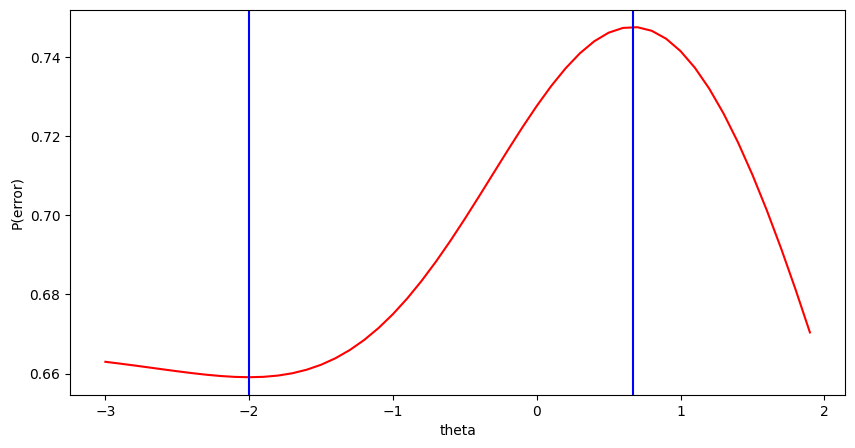

P(error)_mín =  0.6590832893506069
P(error)_máx =  0.7475074624530771


In [23]:
from scipy.stats import norm
Pomega1 = 1/3
Pomega2 = 2/3
mu1 = 0
mu2 = 2
sigma1 = 1
sigma2 = 2
#
def Perror(theta):
    return Pomega1 * norm.cdf(theta, mu1, sigma1 ) + Pomega2 * (1-norm.cdf(theta, mu2,sigma2))
#
theta = np.arange(-3,2, 0.1)
plt.plot(theta, Perror(theta), color='r')
plt.xlabel("theta")
plt.ylabel("P(error)")
plt.axvline(x=-2, color='b', linestyle='-')
plt.axvline(x=2/3, color='b', linestyle='-')
#plt.axhline(y=Perror(-2), color='b', linestyle='-')
plt.show()
print('P(error)_mín = ',Perror(-2))
print('P(error)_máx = ',Perror(2/3))



### **Problema 6**

In [24]:
## Discriminat functions
#
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,5]
#
def g(x,Pomega,mu,sigma):
    return Pomega * norm.pdf(x, mu, sigma)
#
def gr(x,Pomega1,Pomega2,mu1,mu2,sigma1,sigma2):
    return (1-rs) * (g(x,Pomega1,mu1,sigma1) + g(x,Pomega2,mu2,sigma2))


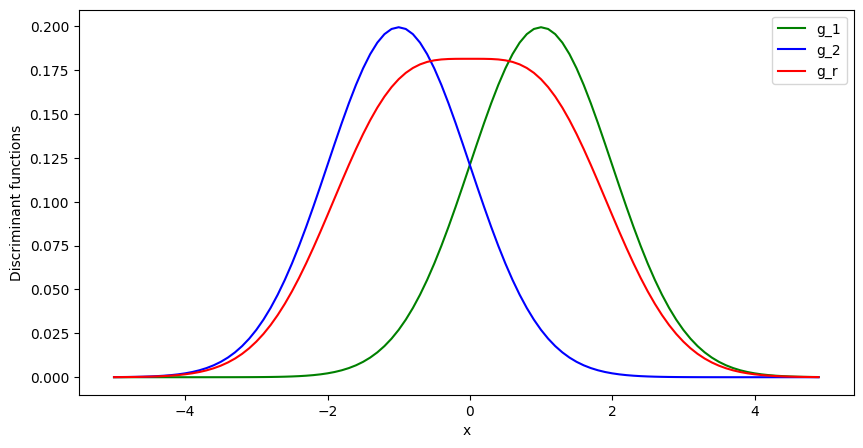

In [25]:
Pomega1 = 0.5
Pomega2 = 0.5
mu1 = 1
mu2 = -1
sigma1 = 1
sigma2 = 1
rs = 0.25
#
x = np.arange(-5,5, 0.1)
plt.plot(x, g(x,Pomega1,mu1,sigma1), color='g',  label = "g_1")
plt.plot(x, g(x,Pomega2,mu2,sigma2), color='b',  label = "g_2")
plt.plot(x, gr(x,Pomega1,Pomega2,mu1,mu2,sigma1,sigma2), color='r',  label = "g_r")
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("Discriminant functions")
plt.show()


In [26]:
## Decision boundaries
#
from scipy.optimize import brentq
#
def d1(x) :
  return g(x,Pomega1,mu1,sigma1) - gr(x,Pomega1,Pomega2,mu1,mu2,sigma1,sigma2)
#
def d2(x) :
  return gr(x,Pomega1,Pomega2,mu1,mu2,sigma1,sigma2) - g(x,Pomega2,mu2,sigma2)
#
root1 = brentq(d2, -1, 0)
root2 = brentq(d1, 0, 1)
#
print(root1, root2)


-0.5493061443340702 0.5493061443340702


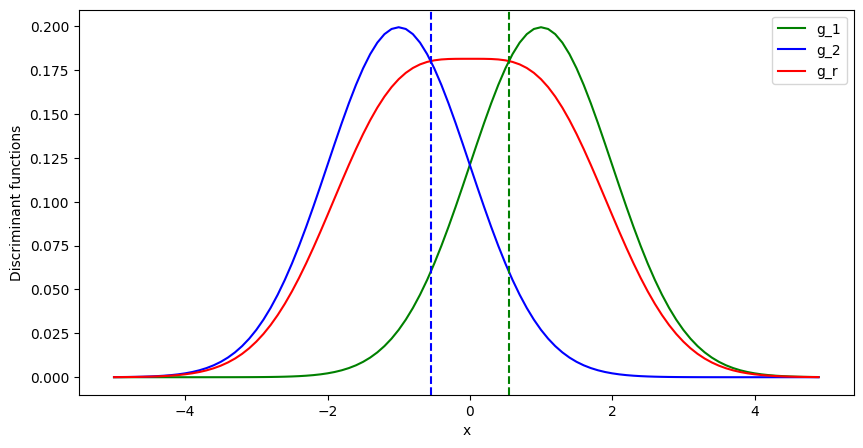

In [27]:
x = np.arange(-5,5, 0.1)
plt.plot(x, g(x,Pomega1,mu1,sigma1), color='g',  label = "g_1")
plt.plot(x, g(x,Pomega2,mu2,sigma2), color='b',  label = "g_2")
plt.plot(x, gr(x,Pomega1,Pomega2,mu1,mu2,sigma1,sigma2), color='r',  label = "g_r")
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("Discriminant functions")
#
plt.axvline(x=root1, color='b', linestyle='--')
plt.axvline(x=root2, color='g', linestyle='--')
#
plt.show()

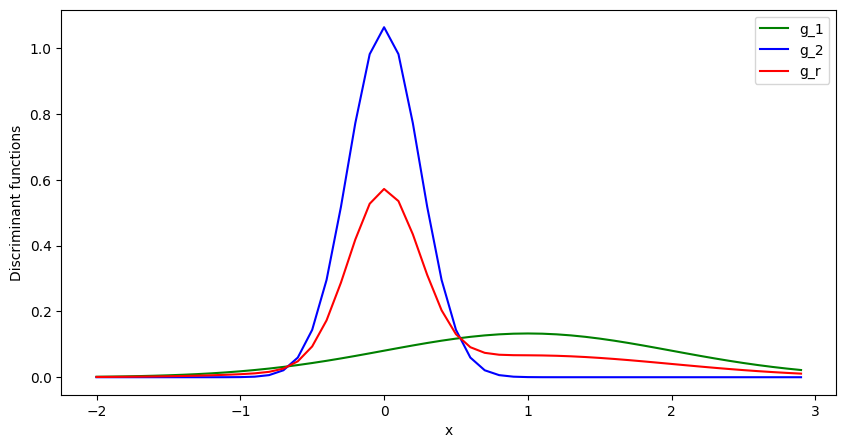

In [28]:
# Another example
#
Pomega1 = 1/3
Pomega2 = 2/3
mu1 = 1
mu2 = 0
sigma1 = 1
sigma2 = 1/4
rs = 0.5
#
x = np.arange(-2,3, 0.1)
plt.plot(x, g(x,Pomega1,mu1,sigma1), color='g',  label = "g_1")
plt.plot(x, g(x,Pomega2,mu2,sigma2), color='b',  label = "g_2")
plt.plot(x, gr(x,Pomega1,Pomega2,mu1,mu2,sigma1,sigma2), color='r',  label = "g_r")
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("Discriminant functions")
plt.show()


### **Problema 7**

In [29]:
## 2D correlated gaussians generator
#
import numpy as np
#
def dataset_fixed_cov(n, mu1, mu2, C):
    """Generate 2 Gaussians samples with the same covariance matrix"""
    dim = 2
    np.random.seed()
    X = np.r_[
        np.dot(np.random.randn(n, dim), C) + mu1,
        np.dot(np.random.randn(n, dim), C) + mu2,
      ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


In [30]:
# Data generation
#
mu1 = np.array([0, 0])
mu2 = np.array([1, 1])
C = np.array([[0.0, -0.23], [0.83, 0.23]])
Sigma = np.dot(np.transpose(C),C)
#
n = 100
#
sample = dataset_fixed_cov(n, mu1, mu2, C)[0]
#
xsample1 = list(map(lambda j :sample[j].flat[0], list(range(0, n))))
ysample1 = list(map(lambda j :sample[j].flat[1], list(range(0, n))))
xsample2 = list(map(lambda j :sample[j].flat[0], list(range(n, 2*n))))
ysample2 = list(map(lambda j :sample[j].flat[1], list(range(n, 2*n))))
#
print(len(xsample1),len(ysample1))
Sigma


100 100


array([[0.6889, 0.1909],
       [0.1909, 0.1058]])

<Axes: >

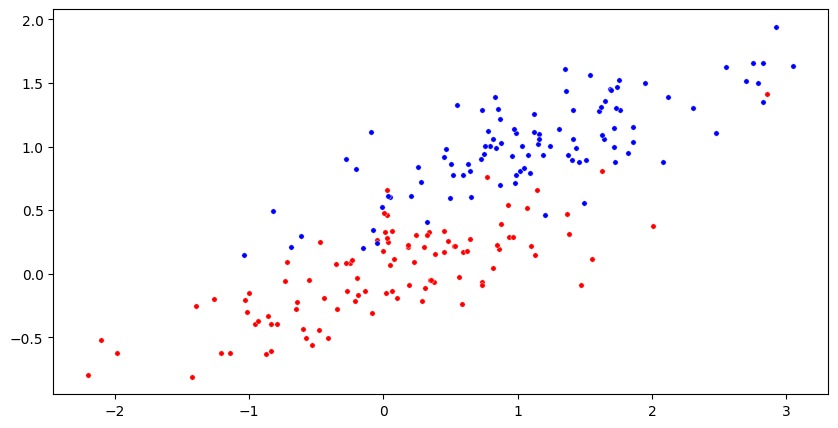

In [31]:
# Visualization
#
import matplotlib.pyplot as plt
import seaborn as sns
#
sns.scatterplot(x=xsample1, y=ysample1, color="r", s=15)
sns.scatterplot(x=xsample2, y=ysample2, color="b", s=15)

<Axes: ylabel='Density'>

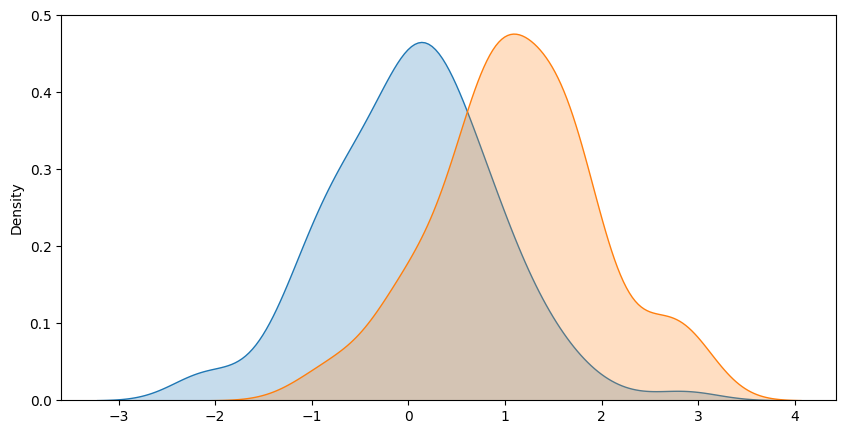

In [32]:
sns.kdeplot(data=xsample1, fill=True)
sns.kdeplot(data=xsample2, fill=True)

In [33]:
## Split arrays into random train and test subsets
# See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#
from sklearn.model_selection import train_test_split
#
fraction = 0.20              # fraction of data for testing
#
y = np.array([1]*n + [2]*n)  # class labels <- no confundir con la coordenada!
#                )
train, test, y_train, y_test = train_test_split(sample, y, test_size=fraction)
#
print(y_test)
#
ntrain = len(y_train)
ntest  = len(y_test)
print(ntrain,ntest)
#
ntrain1 = len(y_train[y_train == 1])
ntrain2 = len(y_train[y_train == 2])
print(ntrain1,ntrain2)
#
ntest1  = len(y_test[y_test == 1])
ntest2  = len(y_test[y_test == 2])
print(ntest1,ntest2)


[1 2 1 2 2 2 1 1 2 1 2 1 2 1 1 2 1 2 1 1 2 1 2 2 1 2 1 1 1 2 2 2 1 1 1 2 1
 2 2 2]
160 40
80 80
20 20


In [34]:
# Training (ponele)
# Setting parameters for the model
#
xtrain1 = list(map(lambda j : train[y_train==1][j].flat[0], list(range(0, ntrain1))))
xtrain2 = list(map(lambda j : train[y_train==2][j].flat[0], list(range(0, ntrain2))))
#
import statistics
#
mean1 = np.mean(xtrain1)
mean2 = np.mean(xtrain2)
sigma1 = statistics.stdev(xtrain1)
sigma2 = statistics.stdev(xtrain2)
#
print(mean1, sigma1)
print(mean2, sigma2)
#

0.032312748517475585 0.8727742104518239
1.10807792394947 0.8177160095110544


In [35]:
# Bayesian classifier 1D <- model for classification
#
ls1 = np.log(sigma1)
ls2 = np.log(sigma2)
#
def classifier(x) :
  if ls1 + (((x-mean1)/sigma1)**2)/2 < ls2 + (((x-mean2)/sigma2)**2)/2 :
      return 1
  else :
      return 2
#

In [36]:
## Classification 1D
#
xtest = list(map(lambda j : test[j].flat[0], list(range(0, ntest)))) # x-coordinate
#
predictions = list(map(lambda j: classifier(xtest[j]), list(range(0, ntest))))
#
predictions = np.array(predictions)
print(predictions)
print(y_test)


[2 2 1 2 1 2 1 1 1 2 2 1 1 1 1 2 1 2 1 2 2 1 2 2 2 2 1 1 1 1 2 2 2 1 1 2 1
 2 1 2]
[1 2 1 2 2 2 1 1 2 1 2 1 2 1 1 2 1 2 1 1 2 1 2 2 1 2 1 1 1 2 2 2 1 1 1 2 1
 2 2 2]


In [37]:
## Evaluation
#
error = predictions != y_test
print(error)
#
nerror = len(error[error==True])
print(nerror)
#
p = nerror/ ntest # fraction of error
print(p)

[ True False False False  True False False False  True  True False False
  True False False False False False False  True False False False False
  True False False False False  True False False  True False False False
 False False  True False]
10
0.25


In [38]:
## Confidence interval
#
import math
z = 1.98  # 95% conficence
num = math.sqrt(p*(1-p)/ntest + (z/(2*ntest))**2)
den = 1 + z**2/n
sd = z * num / den
print('CI: (',p-sd,',',p+sd,')')


CI: ( 0.11129092485812406 , 0.3887090751418759 )
